<center><h1>Spike Encoding of MNIST Dataset</h1></center>

In [1]:
import snntorch as snn
import torch
from torch.utils.data import DataLoader

In [2]:
# Training parameters
batch_size = 128
data_path = "/tmp/data/MNIST"
num_classes = 10  # MNIST has 10 output classes

# Torch Variables
dtype = torch.float

In [3]:
from torchvision import datasets, transforms

# Define a transform
transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

# Dataloader
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

## Rate Encoding of MNIST Images

In [4]:
from snntorch import spikegen

# Spike Encoding
num_steps = 100

data = iter(train_loader)
data_it, target_it = next(data)

### Visualising Spike Encoding with probability = 1

In [5]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

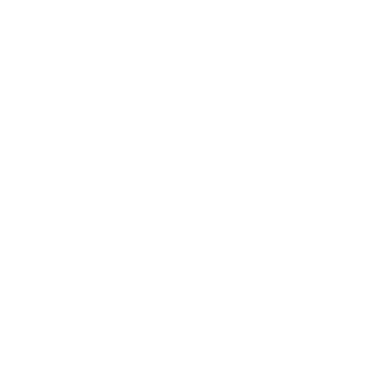

In [29]:
spike_data = spikegen.rate(data_it, num_steps = num_steps)

# Visualising Spiking Neurons
spike_sample = spike_data[:, 4, 0]

# Animating the spikes
fig, ax = plt.subplots()

anim = splt.animator(spike_sample, fig, ax)
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'
HTML(anim.to_html5_video())

### Spike Visualisation for p = 0.25

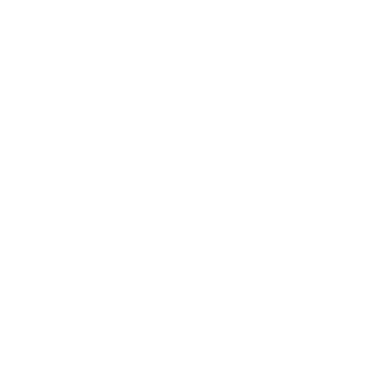

In [48]:
spike_data2 = spikegen.rate(data_it, num_steps = num_steps, gain=0.25)

# Visualising Spiking Neurons
spike_sample2 = spike_data2[:, 4, 0]

# Animating the spikes
fig, ax = plt.subplots()

anim = splt.animator(spike_sample2, fig, ax)
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'
HTML(anim.to_html5_video())

## Reconstruction of Stimulus (Image) from spikes

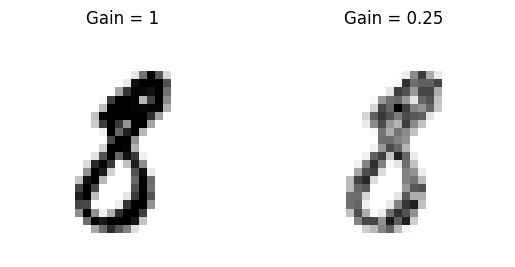

In [49]:
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_sample.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 1')

plt.subplot(1,2,2)
plt.imshow(spike_sample2.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 0.25')

plt.show()

## Raster Plots for Spike Encoding

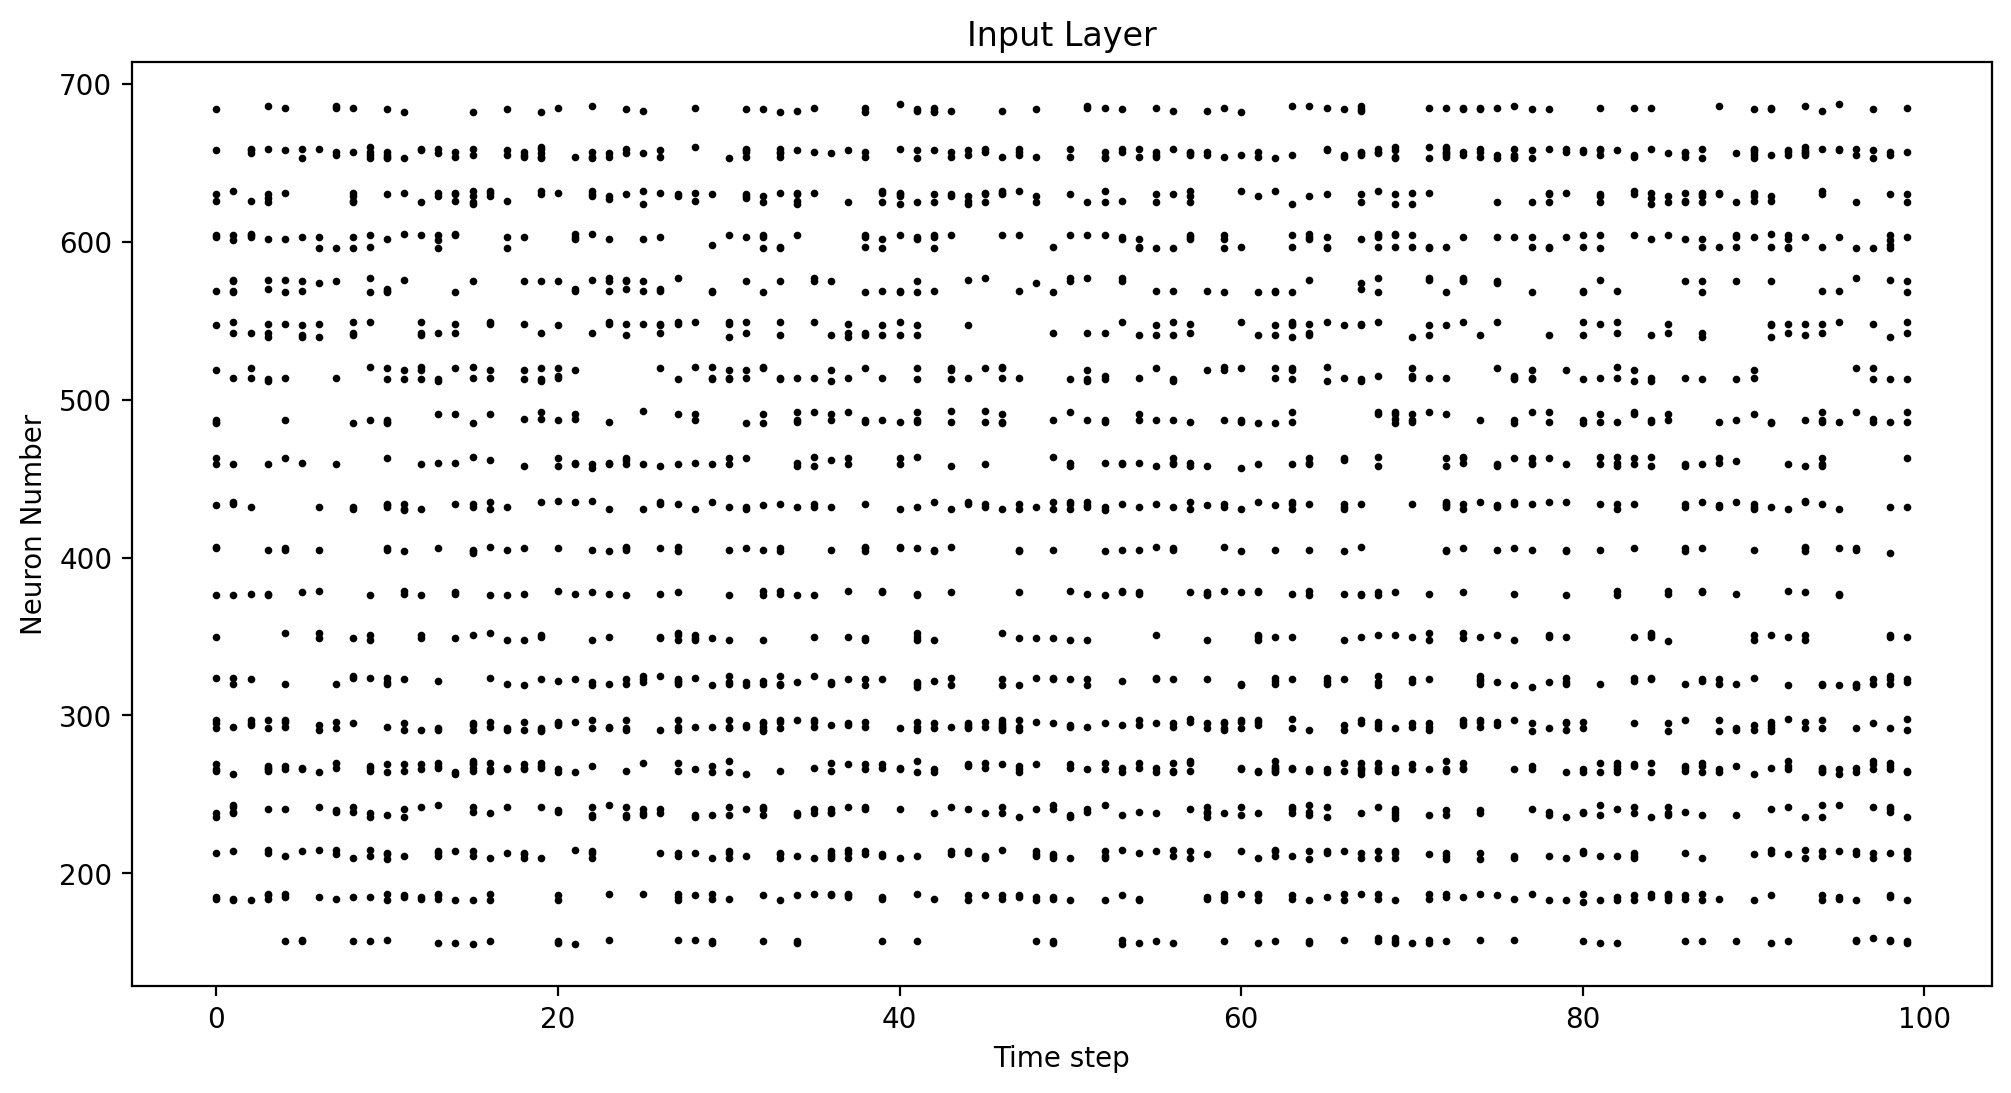

In [58]:
# Reshape
spike2 = spike_sample2.reshape((num_steps, -1))

# Raster Plot
fig = plt.figure(figsize=(12, 6), dpi=200)
ax = fig.add_subplot()
splt.raster(spike2, ax, s=3, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")

plt.show()

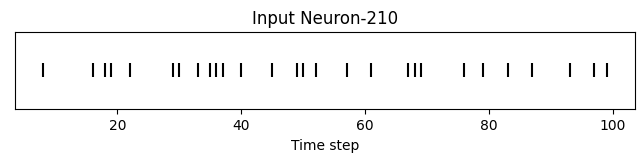

In [61]:
idx = 210  # index into 210th neuron

fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spike2[:, idx].unsqueeze(1), ax, s=100, c="black", marker="|")

plt.title(f"Input Neuron-{idx}")
plt.xlabel("Time step")
plt.yticks([])
plt.show()

## Latency Coding of MNIST Data

In [65]:
# Find time of spike for each particular input

def convert_to_time(data, tau=5, threshold=0.01):
    spike_time = tau * torch.log(data / (data - threshold))
    return spike_time

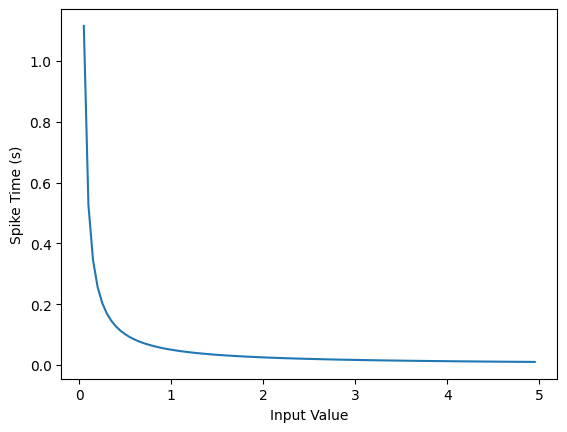

In [66]:
# Smaller the stimulus, later the neuron will fire: Comes from Hodgkin Huxely Model
raw_input = torch.arange(0, 5, 0.05) # tensor from 0 to 5
spike_times = convert_to_time(raw_input)

plt.plot(raw_input, spike_times)
plt.xlabel('Input Value')
plt.ylabel('Spike Time (s)')
plt.show()

## Raster Plots for Latency Encoding

In [67]:
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01)

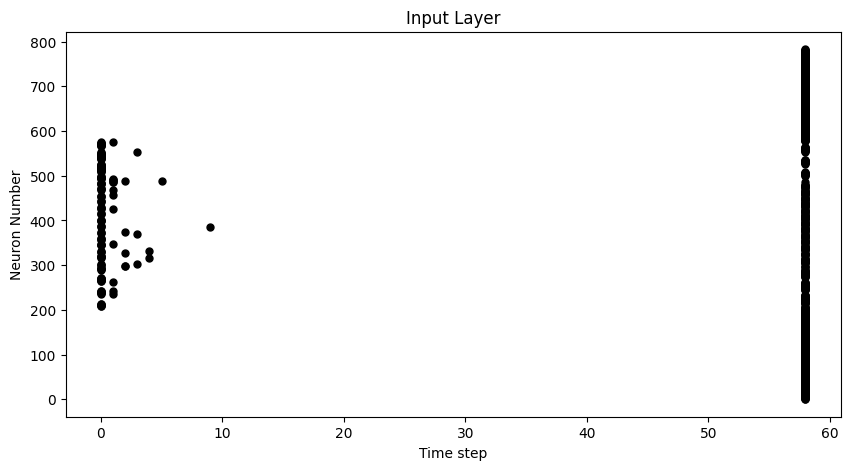

In [68]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

### Linearize the time steps and introduce Time constant

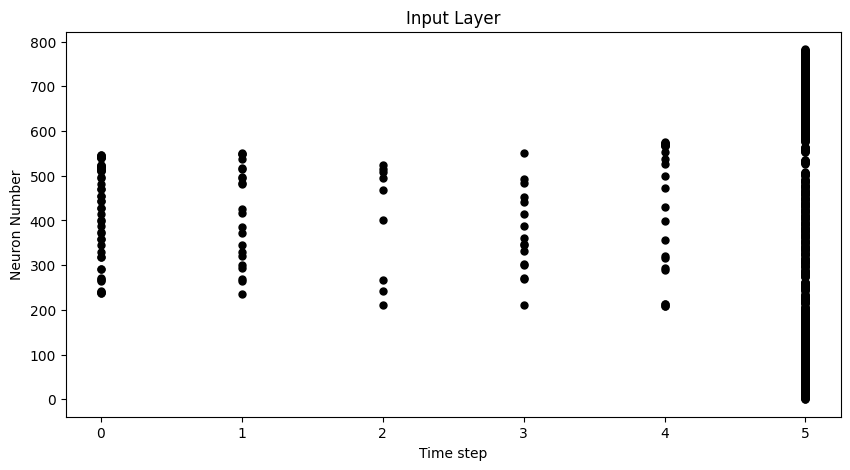

In [69]:
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

### Removing Redundencies

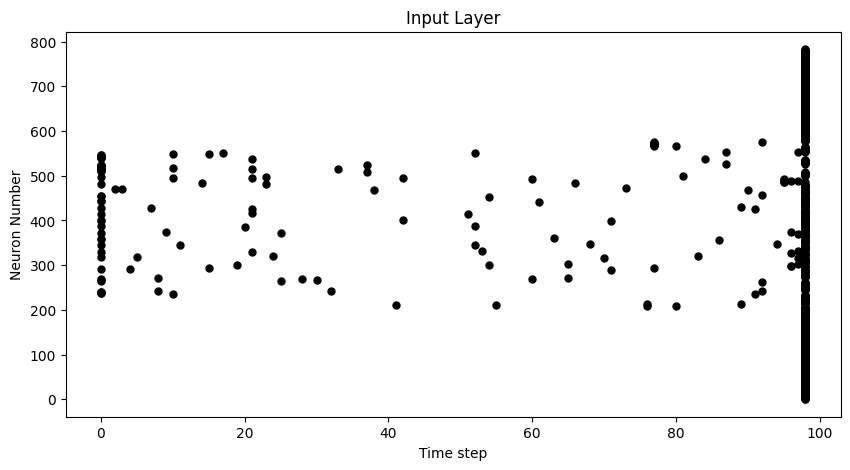

In [71]:
# Normalize the spikes over the entire range of time steps
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01,
                              normalize=True, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

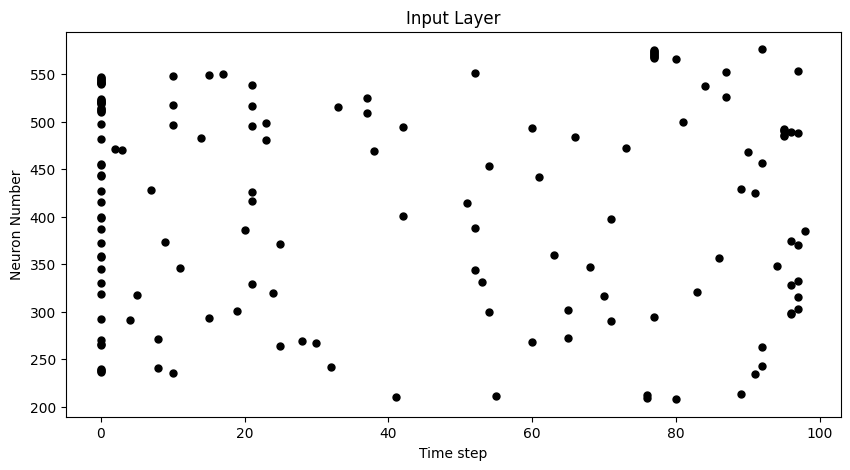

In [70]:
# Clipping off the redundencies
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01,
                              clip=True, normalize=True, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

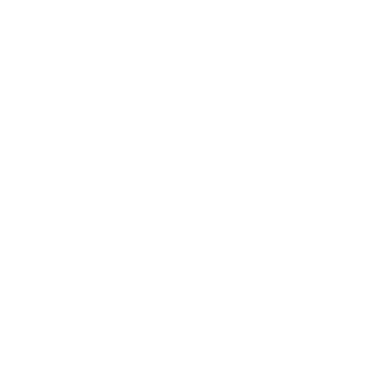

In [73]:
spike_data_sample = spike_data[:, 4, 0]
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)

HTML(anim.to_html5_video())